In [122]:
#Librerias usadas en el desarrollo del programa
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import nc_time_axis
import cftime
import requests
import os

In [123]:
#URL con la información de dropbox con el dataset de sst
#url_sst = "https://www.dropbox.com/scl/fi/gubpg3vx07d3h1zn5ptxn/sst.nc?rlkey=wyho417yy04t946ot13ec6cjh&st=2ib8wwzi&dl=1"

# Descargar el archivo temporalmente
#response = requests.get(url_sst)
#with open('sst.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_sst = xr.open_dataset('sst.nc')
df_sst #Tos es igual a la temperatura en la supeficie del oceano - Datos en Kelvin - Datos Mensuales

<xarray.Dataset>
Dimensions:    (time: 720, bnds: 2, lat: 90, lon: 144)
Coordinates:
  * time       (time) object 1951-01-16 12:00:00 ... 2010-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          amip
    source:                 GISS-E2-R-E135OCNf9aF40 Atmosphere: GISS-E2
    model_id:               GISS-E2-R
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes or...
    ...                     ...
    table_id:               Table Omon (31 January 2011) 0e69fc5d1417dfcfbf0a...
    title:                  GISS-E2-R model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         ocean
    realization:            1
    cmor_version:           2.5.7

In [124]:
#URL con la información de dropbox con el dataset de slp
#url_slp = "https://www.dropbox.com/scl/fi/xjyo67lv366earknxuxjx/slp.mon.mean.nc?rlkey=42y7e5lq0fpah3vlt2piy4hja&st=evl10nst&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_slp)
#with open('slp.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_slp = xr.open_dataset('slp.nc')
df_slp #Ver los datos del slp 



<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 919)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    slp      (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [125]:
#URL con la información de dropbox con el dataset de olr
#url_olr = "https://www.dropbox.com/scl/fi/3f520wpuuvgb00567vd17/olr.mon.mean.1975.nc?rlkey=gv45ar9na6slnd504uis32eta&st=855gy7kw&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_olr)
#with open('olr.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_olr = xr.open_dataset('olr.nc')
df_olr #Ver los datos del olr 

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 576)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1975-01-01 1975-02-01 ... 2022-12-01
Data variables:
    olr      (time, lat, lon) float32 ...
Attributes:
    title:          Monthly means of OLR from interpolated OLR dataset
    description:    Data is interpolated in time and space from NOAA twice-da...
    platform:       Observation
    Conventions:    CF-1.2
    References:     https://www.psl.noaa.gov/data/gridded/data.interp_OLR.html
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    Citation:       Liebmann and Smith: June 2006: Description of a Complete ...
    dataset_title:  NOAA Interpolated Outgoing Longwave Radiation (OLR)
    source:         ftp.cpc.ncep.noaa.gov precip/noaa..
    date_modified:  12 Feb 2019
    history:        Tue Dec 12 11:00:30 2023: ncks -d time,7, olr.mon.mean.nc...
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [126]:
#URL con la información de dropbox con el dataset de U winds: Vientos (Vientos zonales)
#url_u_winds = "https://www.dropbox.com/scl/fi/pb5wp86v7j4j64tc2247u/uwnd.10m.mon.mean.nc?rlkey=nwjwdy93thksxhvblm9m0ky2a&st=27rdj43x&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_u_winds)
#with open('u_winds.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_u_winds = xr.open_dataset('u_winds.nc')
df_u_winds #Ver los datos del los vientos zonales a 10 metros del nivel del mar

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 919)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    uwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121013
    history:        renamevars Thu Feb  1 09:41:58 2001 from uwnd10m.mon.mean...
    title:          monthly mean uwnd.10m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [127]:
#URL con la información de dropbox con el dataset de U winds: Vientos (Vientos meridoniales)
#url_v_winds = "https://www.dropbox.com/scl/fi/uhb8a307ashl2gpop197u/vwnd.10m.mon.mean.nc?rlkey=dlddkzii8okq2gkrab1fhyg0h&st=bm9kqff4&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_v_winds)
#with open('v_winds.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_v_winds = xr.open_dataset('v_winds.nc')
df_v_winds #Ver los datos del los vientos meridoniales a 10 metros del nivel del mar

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 919)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    vwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121013
    history:        renamevars Thu Feb  1 09:47:30 2001 from vwnd10m.mon.mean...
    title:          monthly mean vwnd.10m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

Empezamos con el analisis de los datos que vamos a trabajar en para la predicción del ENSO en la region del Niño 3.4

Nos concentraremos en la región del Niño 3.4 y los datos iran desde el 20 de Enero de 1951 hasta 1 de Diciembre de 2010

C:\Users\orteg\AppData\Local\Temp\ipykernel_272\257485962.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  times_converted = tos_mean.indexes['time'].to_datetimeindex()


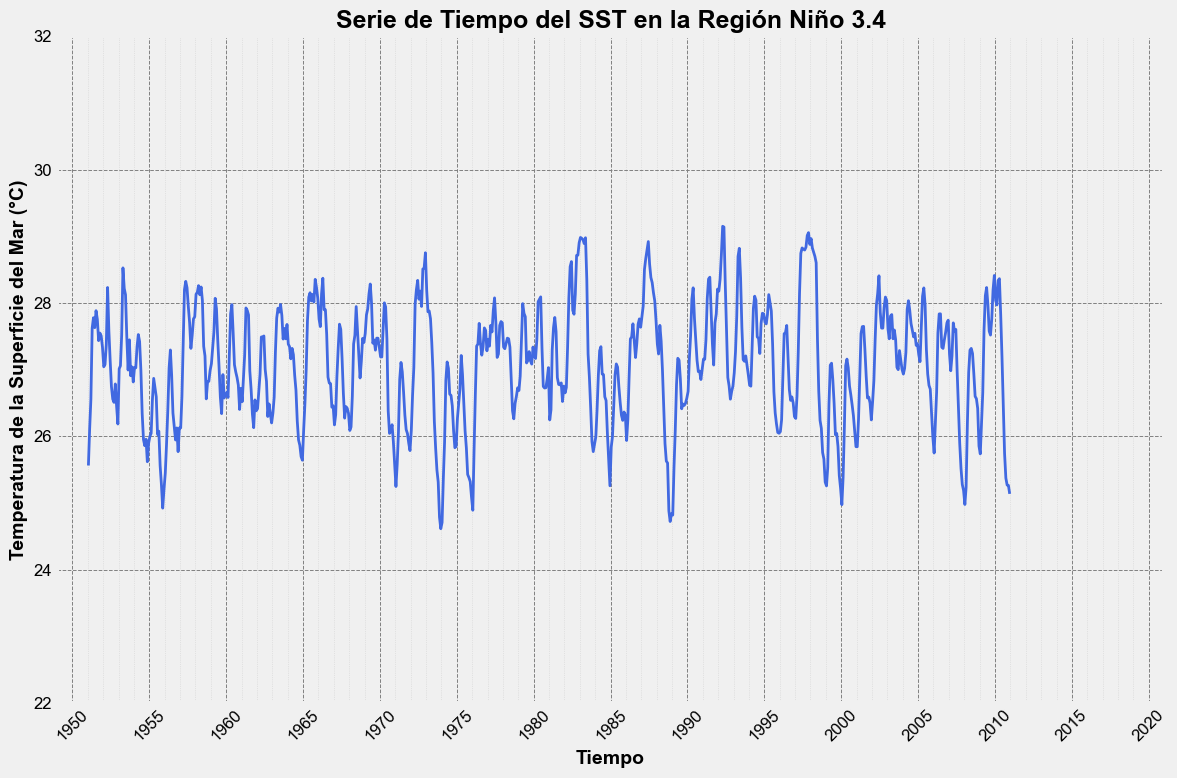

In [128]:
#SST

plt.rc('font', family='Arial', size=10)

df_sst_nino3_4 = df_sst.sel(lat=slice(-5, 5), lon=slice(190, 240)) #DataArray de la region nino 3.4
tos = df_sst_nino3_4['tos']- 273.15
# Calcular el promedio sobre las dimensiones de latitud y longitud
tos_mean = tos.mean(dim=['lat', 'lon'])

# Convertir las fechas a cftime.datetime si es necesario ------> IMPORTANTISIMO
times_converted = tos_mean.indexes['time'].to_datetimeindex()

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(times_converted, tos_mean, color='royalblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Temperatura de la Superficie del Mar (°C)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(times_converted.min(), times_converted.max())

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Establecer el límite inferior del eje Y en 20°C
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))
ax.set_ylim(22, 32)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

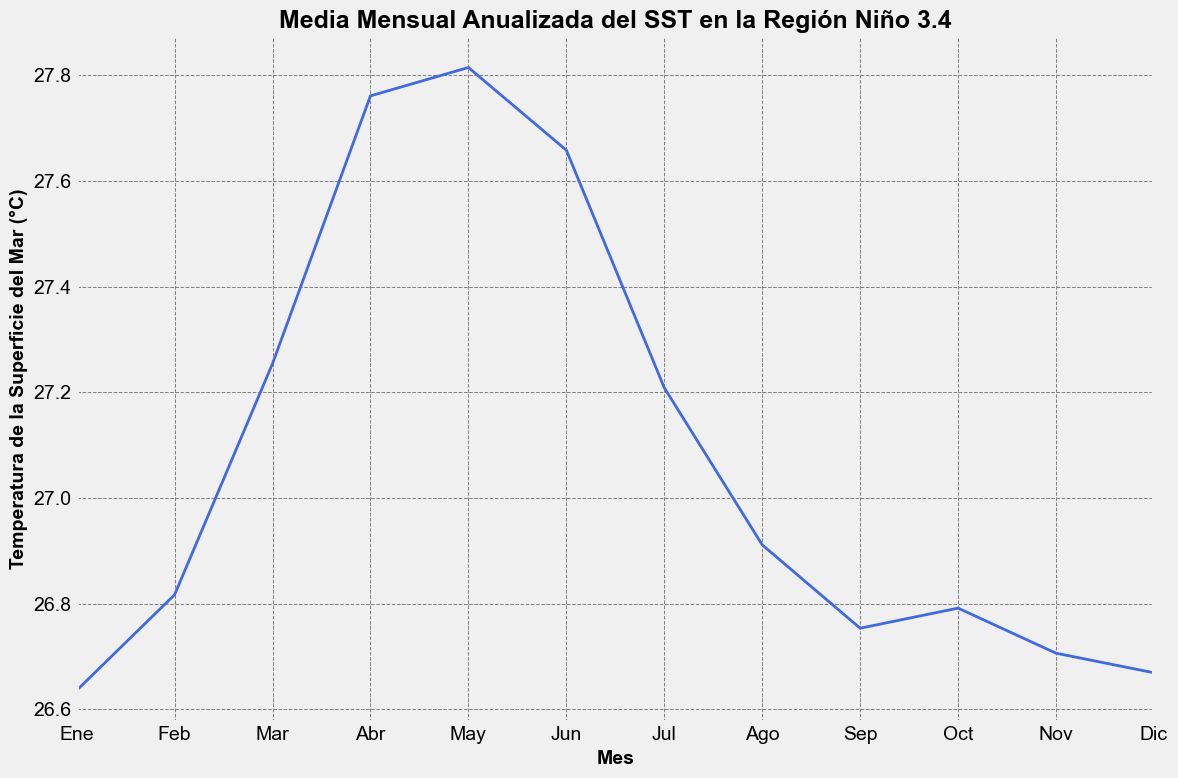

In [129]:
#ESTADISTICA DESCRIPTIVA DEL STT
#Media mensual anualizada -- Desviación Estándar Mensual Anualizada -- Anomalía Mensual -- Tendencia


#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
sst_df = pd.DataFrame({'SST': tos_mean.values}, index=times_converted)

# Calcular la media mensual anualizada
sst_monthly_mean = sst_df.resample('M').mean()  # Media mensual
sst_monthly_mean_anualizada = sst_monthly_mean.groupby(sst_monthly_mean.index.month).mean()


plt.rc('font', family='Arial', size=10)

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(sst_monthly_mean_anualizada.index, sst_monthly_mean_anualizada['SST'], color='royalblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Temperatura de la Superficie del Mar (°C)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()

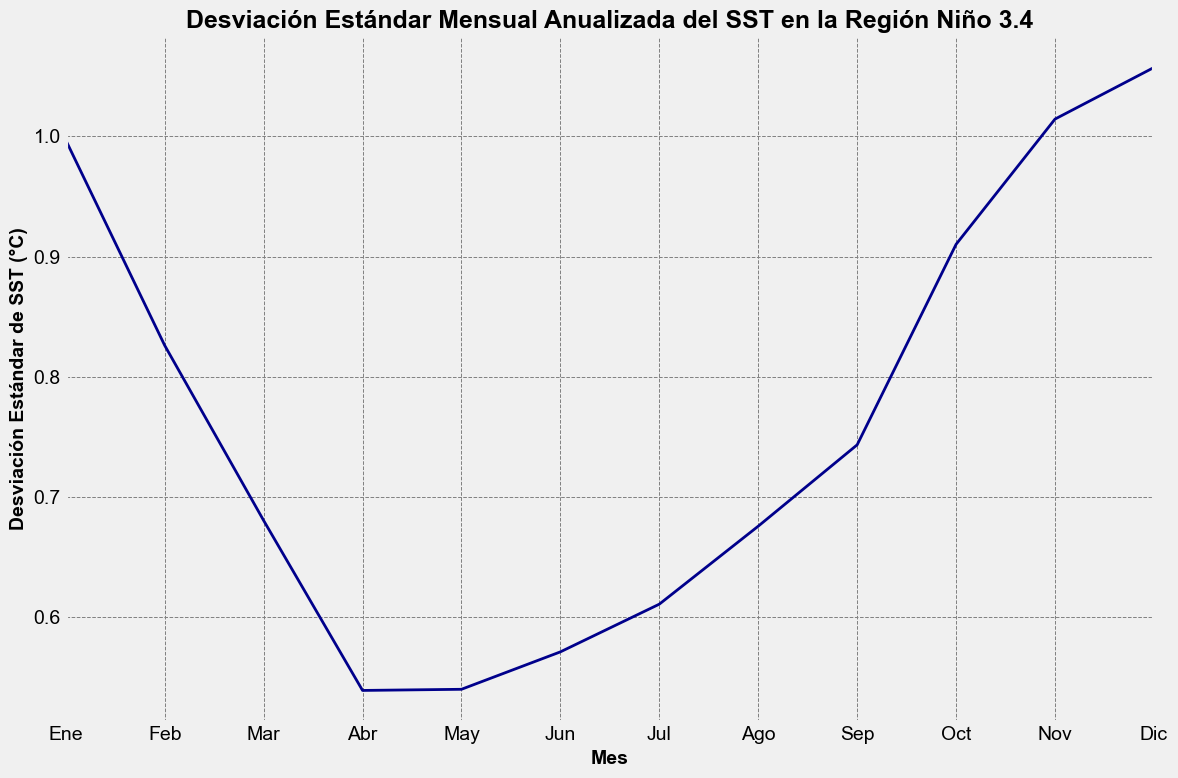

In [130]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
sst_monthly_std_anualizada = sst_df.groupby(sst_df.index.month).std()

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro estilo disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(sst_monthly_std_anualizada.index, sst_monthly_std_anualizada['SST'], color='darkblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de SST (°C)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

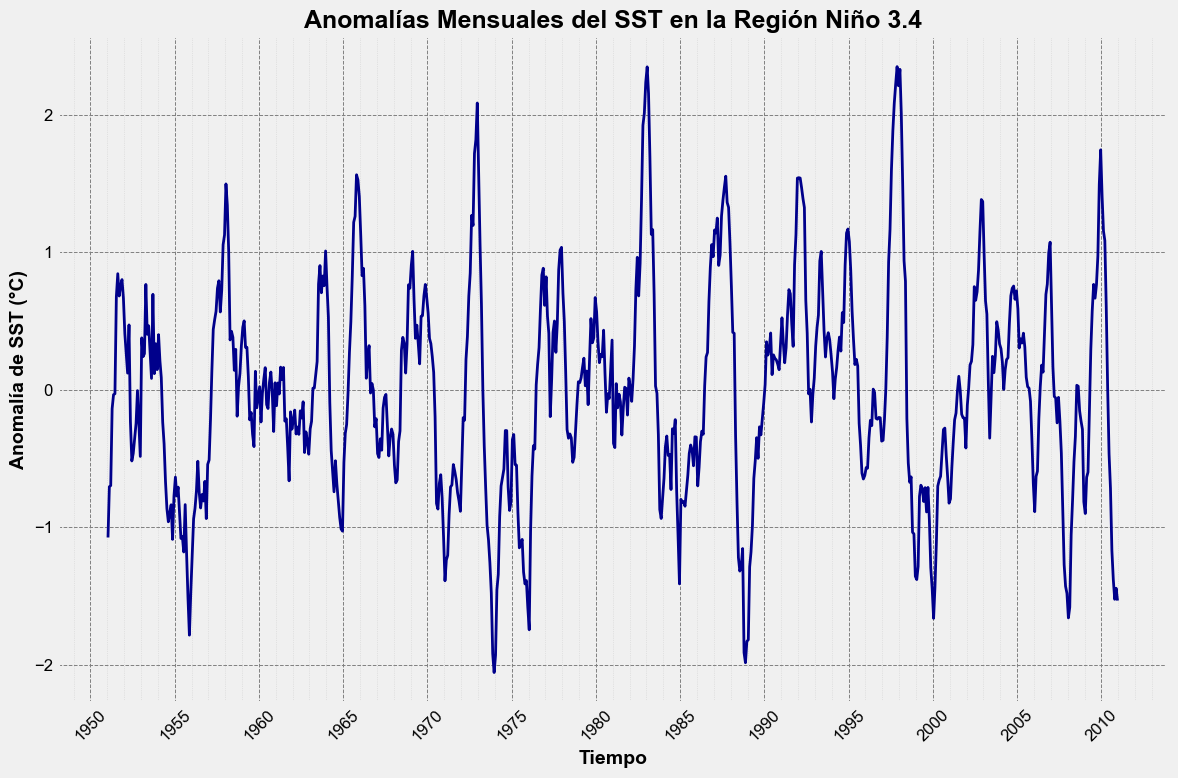

In [131]:
#Anomalia Mensual

# Calcular las anomalías mensuales
sst_anomalies = sst_df.copy()
sst_anomalies['Anomalía'] = sst_df['SST'] - sst_anomalies.index.month.map(sst_monthly_mean_anualizada['SST'])

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(sst_anomalies.index, sst_anomalies['Anomalía'], color='darkblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de SST (°C)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

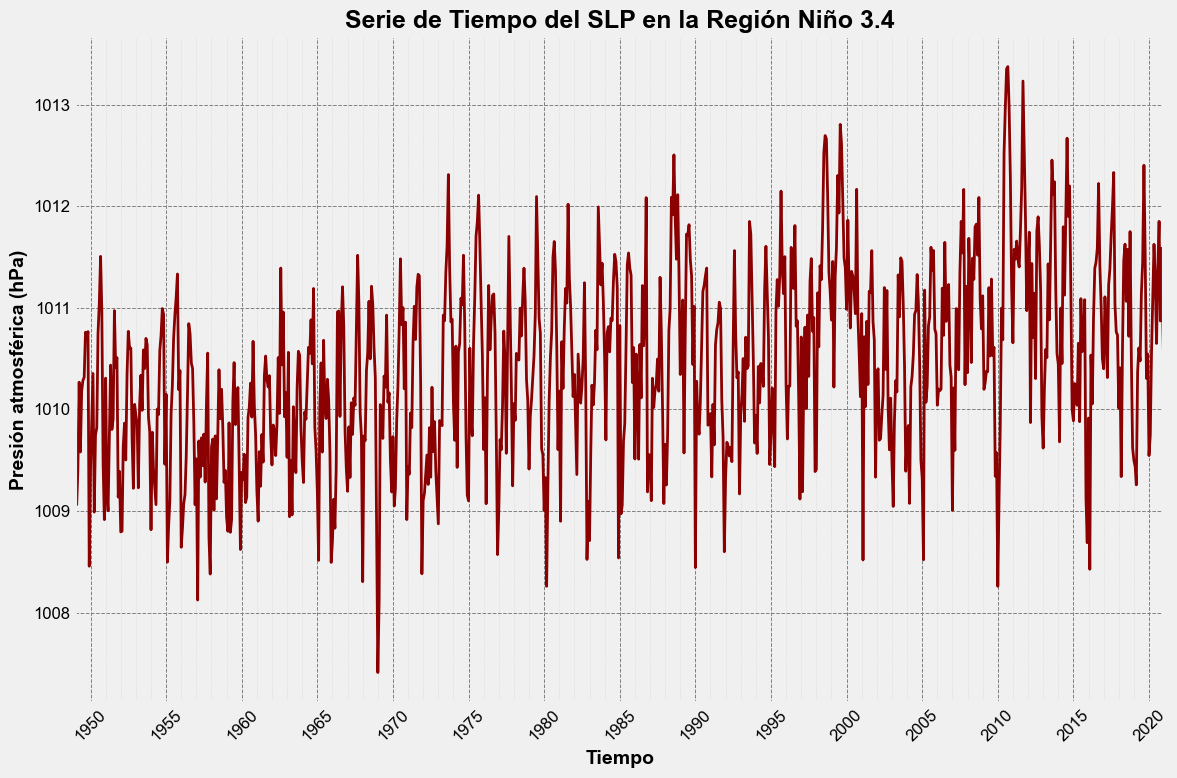

In [132]:
# SLP

plt.rc('font', family='Arial', size=10)

df_slp_nino3_4 = df_slp.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
slp = df_slp_nino3_4['slp']
# Calcular el promedio sobre las dimensiones de latitud y longitud
slp_mean = slp.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(slp_mean['time'], slp_mean, color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Presión atmosférica (hPa)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(slp_mean['time'].min().values, slp_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


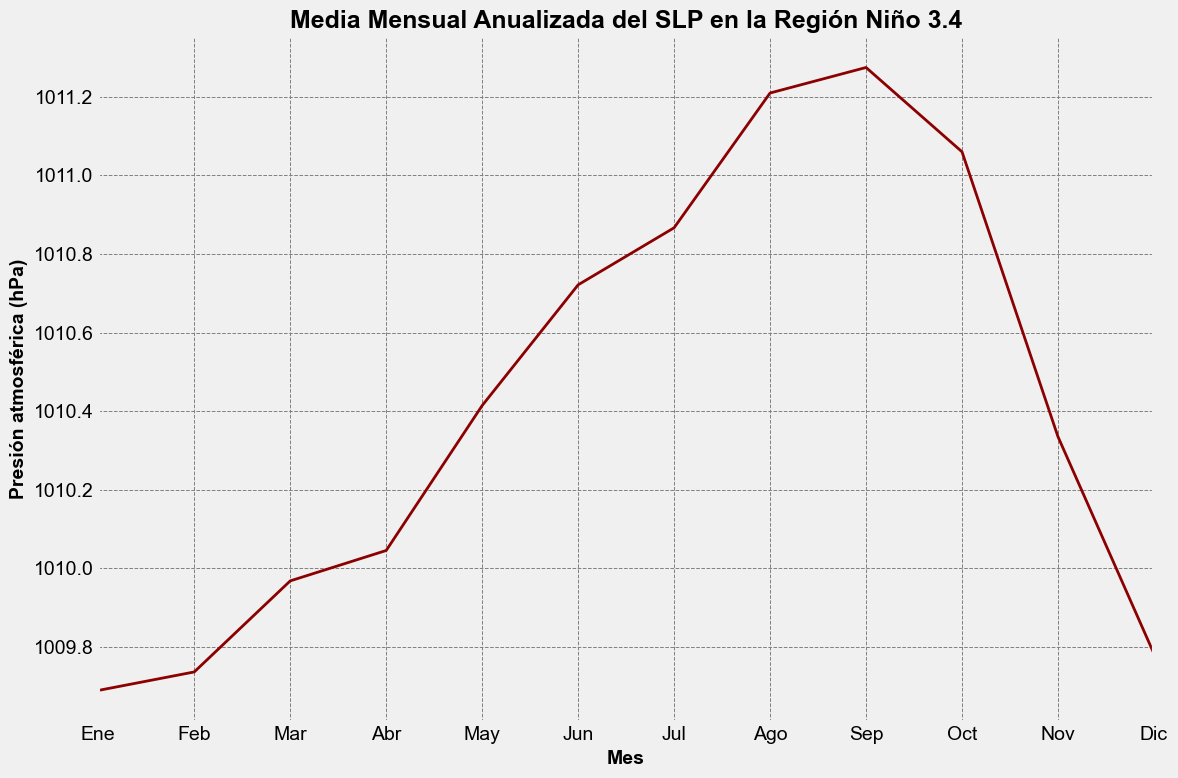

In [133]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
slp_df = pd.DataFrame({'SLP': slp_mean.values}, index=slp_mean['time'].values)

# Calcular la media mensual anualizada
slp_monthly_mean = slp_df.resample('M').mean()  # Media mensual
slp_monthly_mean_anualizada = slp_monthly_mean.groupby(slp_monthly_mean.index.month).mean()

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(slp_monthly_mean_anualizada.index, slp_monthly_mean_anualizada['SLP'], color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Presión atmosférica (hPa)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

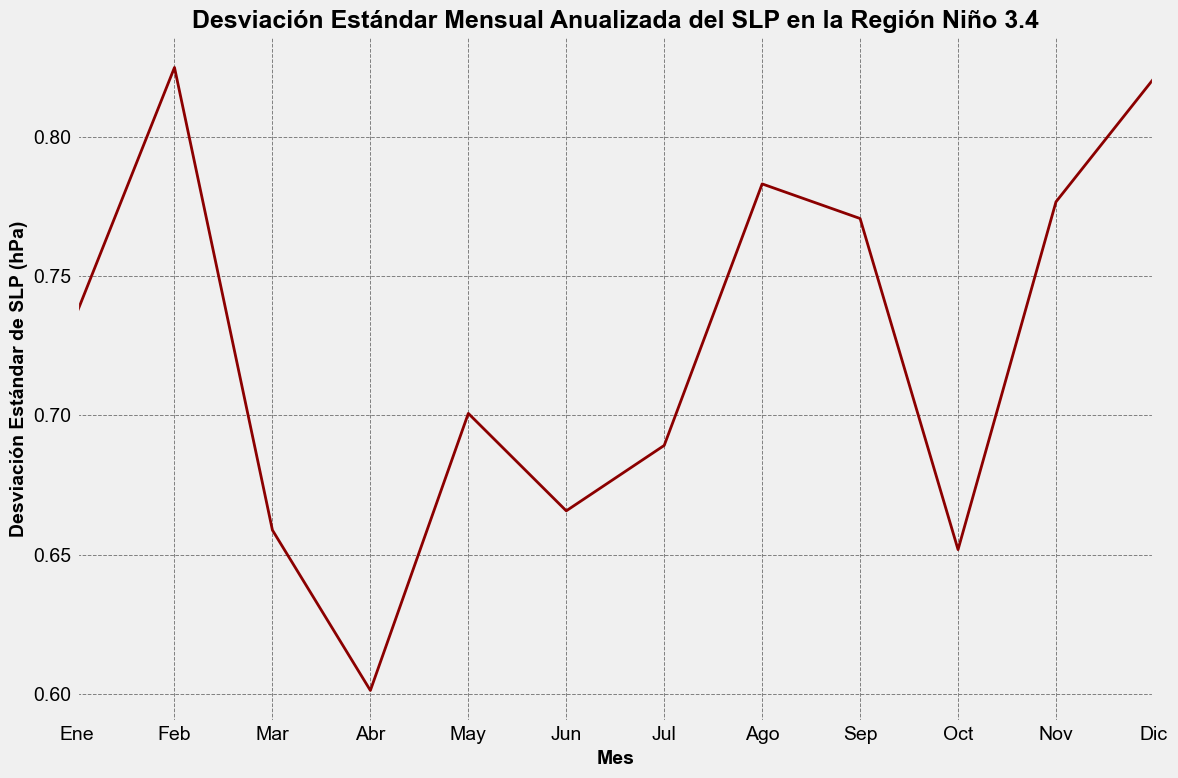

In [134]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
slp_monthly_std_anualizada = slp_df.groupby(slp_df.index.month).std()

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro estilo disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(slp_monthly_std_anualizada.index, slp_monthly_std_anualizada['SLP'], color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de SLP (hPa)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

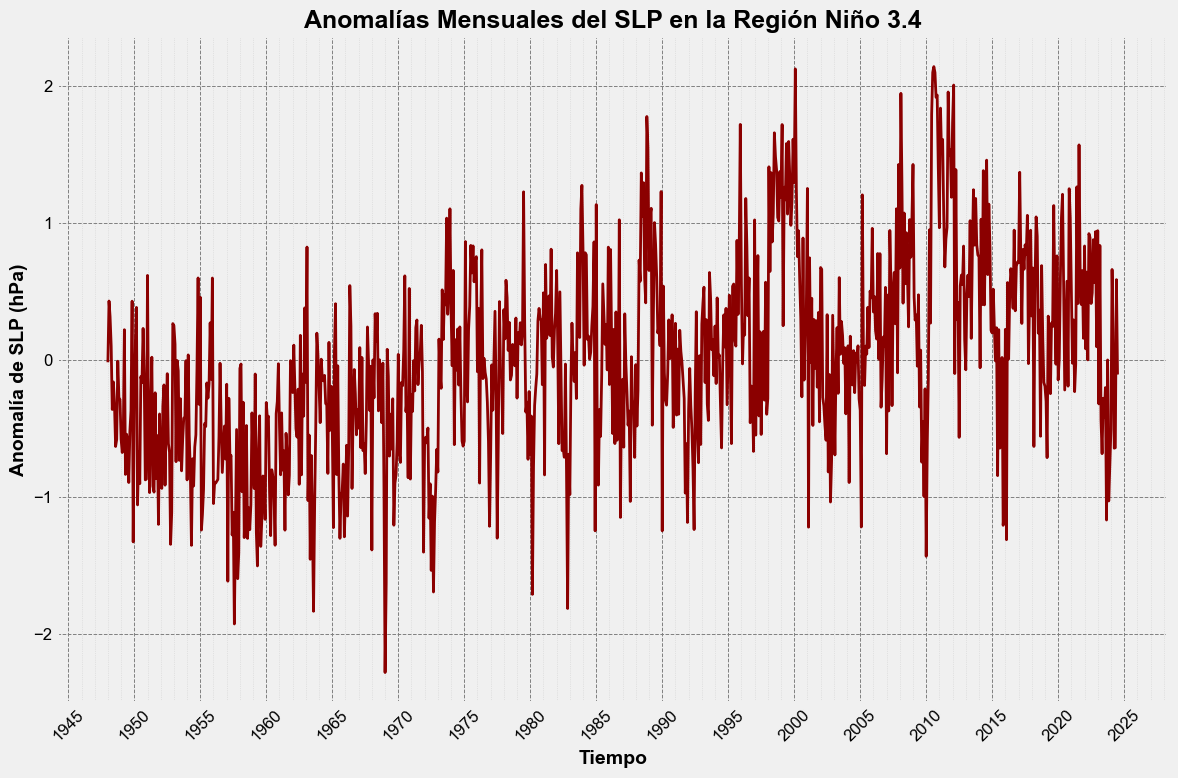

In [135]:
#Anomalia Mensual

# Calcular las anomalías mensuales
slp_anomalies = slp_df.copy()
slp_anomalies['Anomalía'] = slp_df['SLP'] - slp_anomalies.index.month.map(slp_monthly_mean_anualizada['SLP'])

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(slp_anomalies.index, slp_anomalies['Anomalía'], color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de SLP (hPa)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

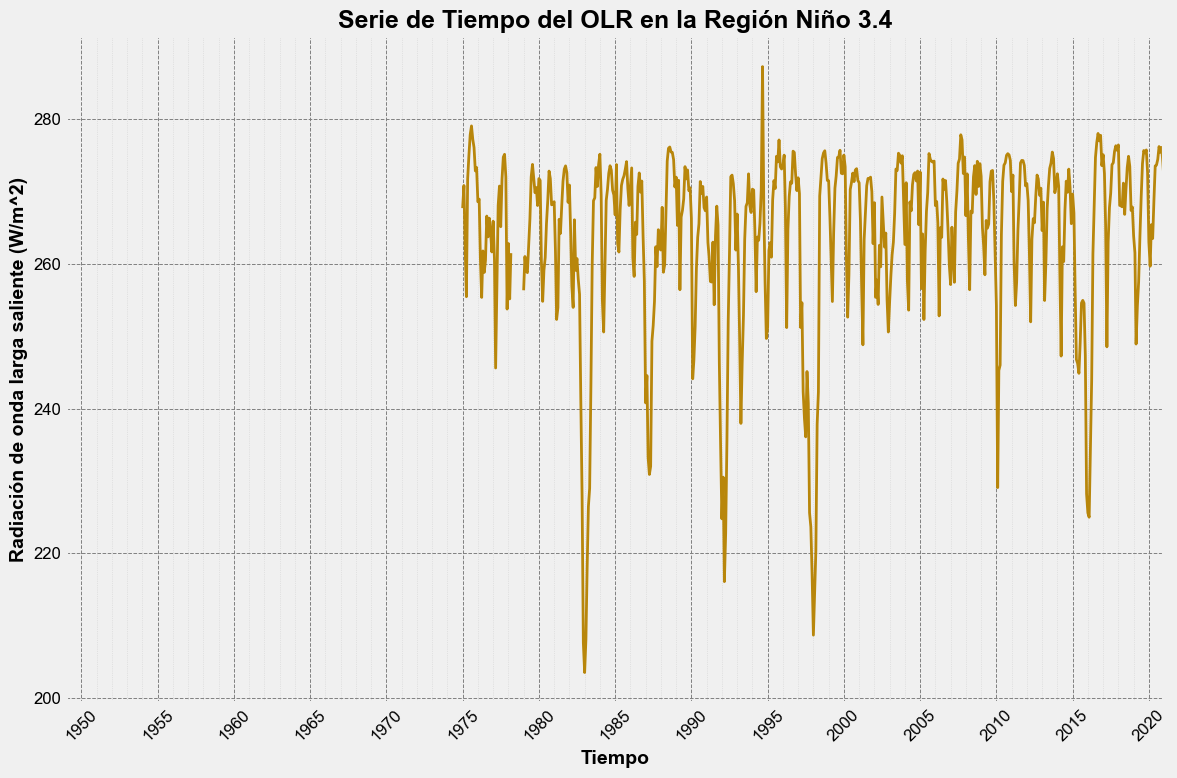

In [136]:
#OLR
plt.rc('font', family='Arial', size=10)

# Recortamos la gráfica de slp a la región requerida por nosotros
df_olr_nino3_4 = df_olr.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
olr = df_olr_nino3_4['olr']
# Calcular el promedio sobre las dimensiones de latitud y longitud
olr_mean = olr.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(olr_mean['time'], olr_mean, color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Radiación de onda larga saliente (W/m^2)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(olr_mean['time'].min().values, olr_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


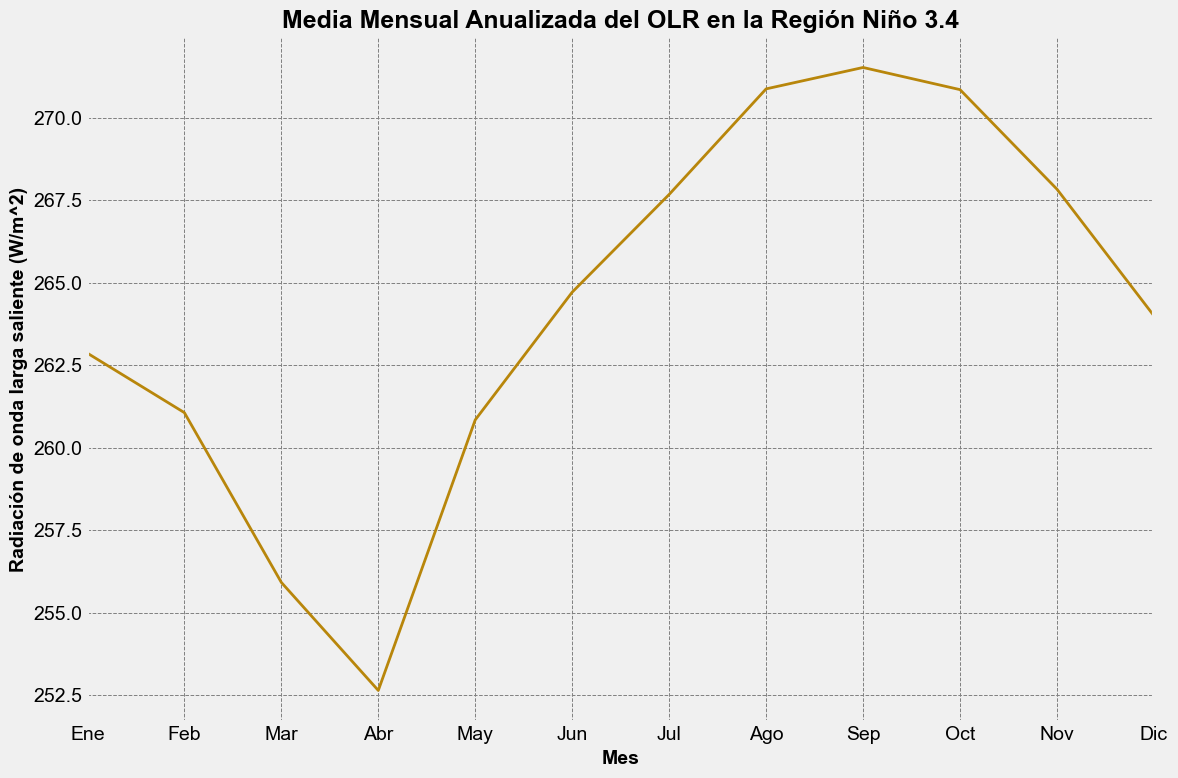

In [137]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
olr_df = pd.DataFrame({'OLR': olr_mean.values}, index=olr_mean['time'].values)

# Calcular la media mensual anualizada
olr_monthly_mean = olr_df.resample('M').mean()  # Media mensual
olr_monthly_mean_anualizada = olr_monthly_mean.groupby(olr_monthly_mean.index.month).mean()

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(olr_monthly_mean_anualizada.index, olr_monthly_mean_anualizada['OLR'], color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Radiación de onda larga saliente (W/m^2)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

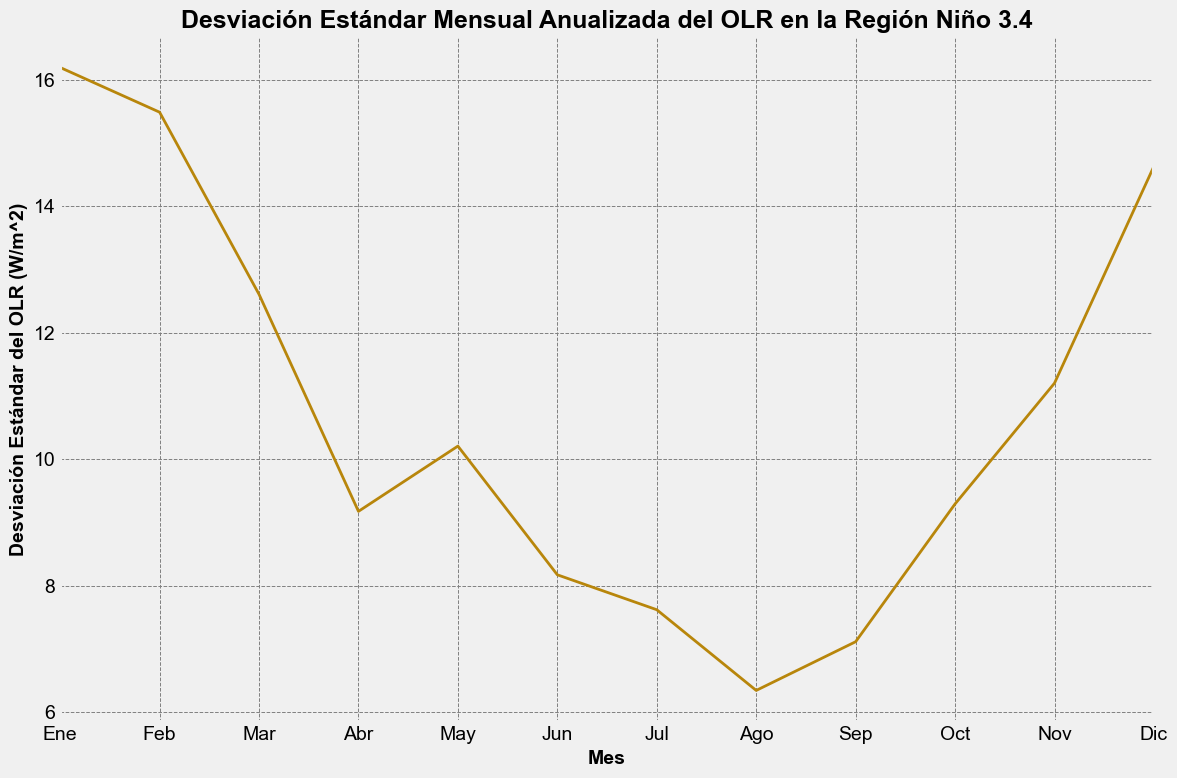

In [138]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
olr_monthly_std_anualizada = olr_df.groupby(olr_df.index.month).std()

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight') 

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(olr_monthly_std_anualizada.index, olr_monthly_std_anualizada['OLR'], color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar del OLR (W/m^2)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

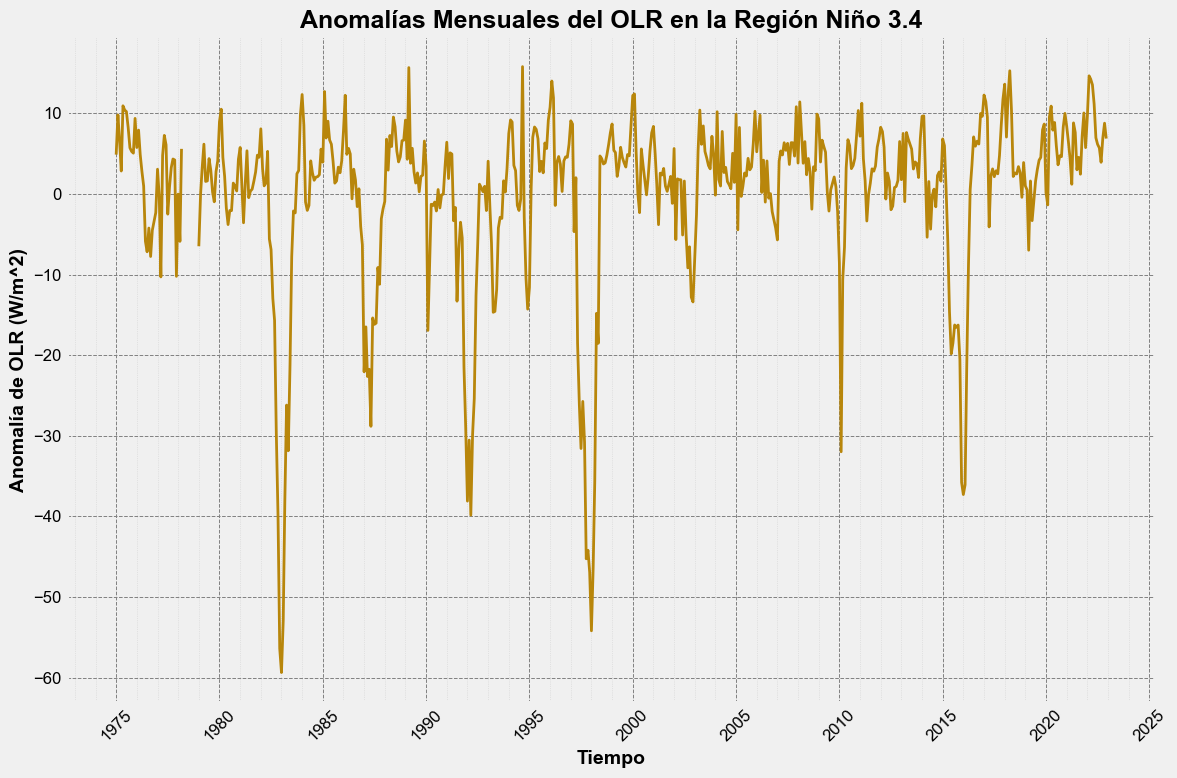

In [139]:
#Anomalia Mensual

# Calcular las anomalías mensuales
olr_anomalies = olr_df.copy()
olr_anomalies['Anomalía'] = olr_df['OLR'] - olr_anomalies.index.month.map(olr_monthly_mean_anualizada['OLR'])

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(olr_anomalies.index, olr_anomalies['Anomalía'], color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de OLR (W/m^2)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

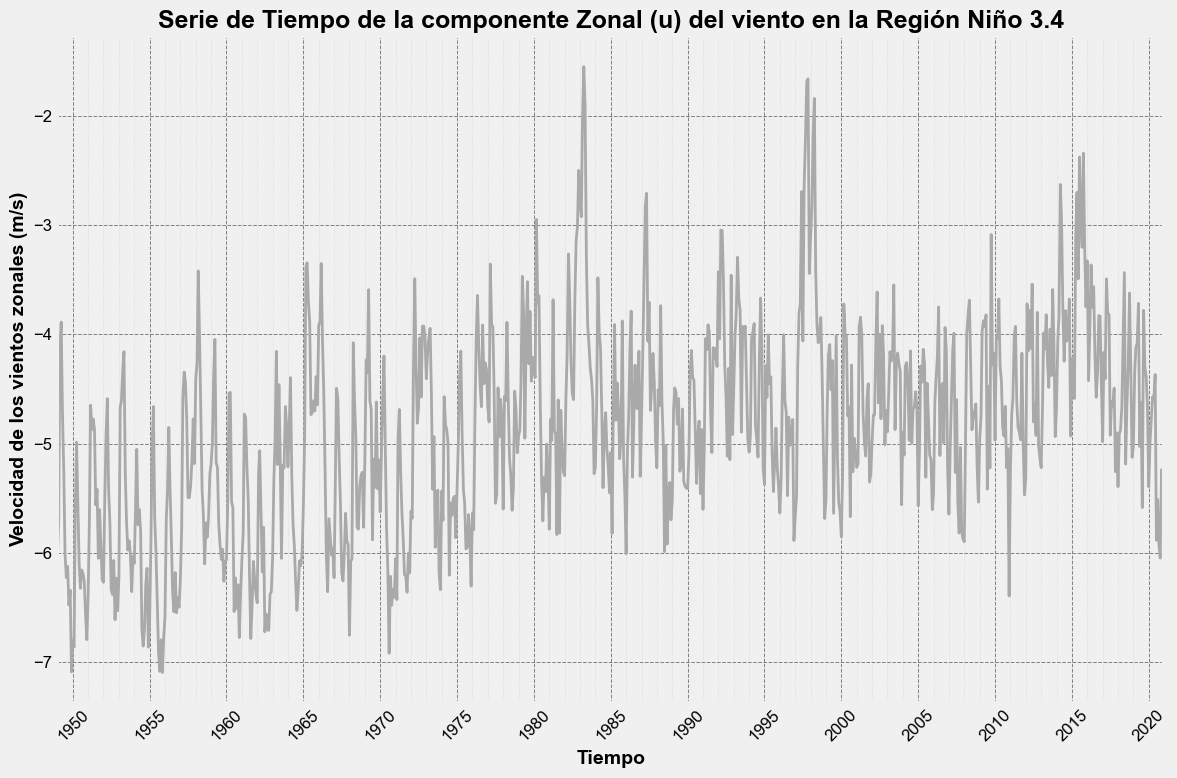

In [140]:
#Vientos Zonales (10 metros)

# Recortamos la gráfica de slp a la región requerida por nosotros
df_u_winds_nino3_4 = df_u_winds.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
u_winds = df_u_winds_nino3_4['uwnd']
# Calcular el promedio sobre las dimensiones de latitud y longitud
u_winds_mean = u_winds.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(u_winds_mean['time'], u_winds_mean, color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(u_winds_mean['time'].min().values, u_winds_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

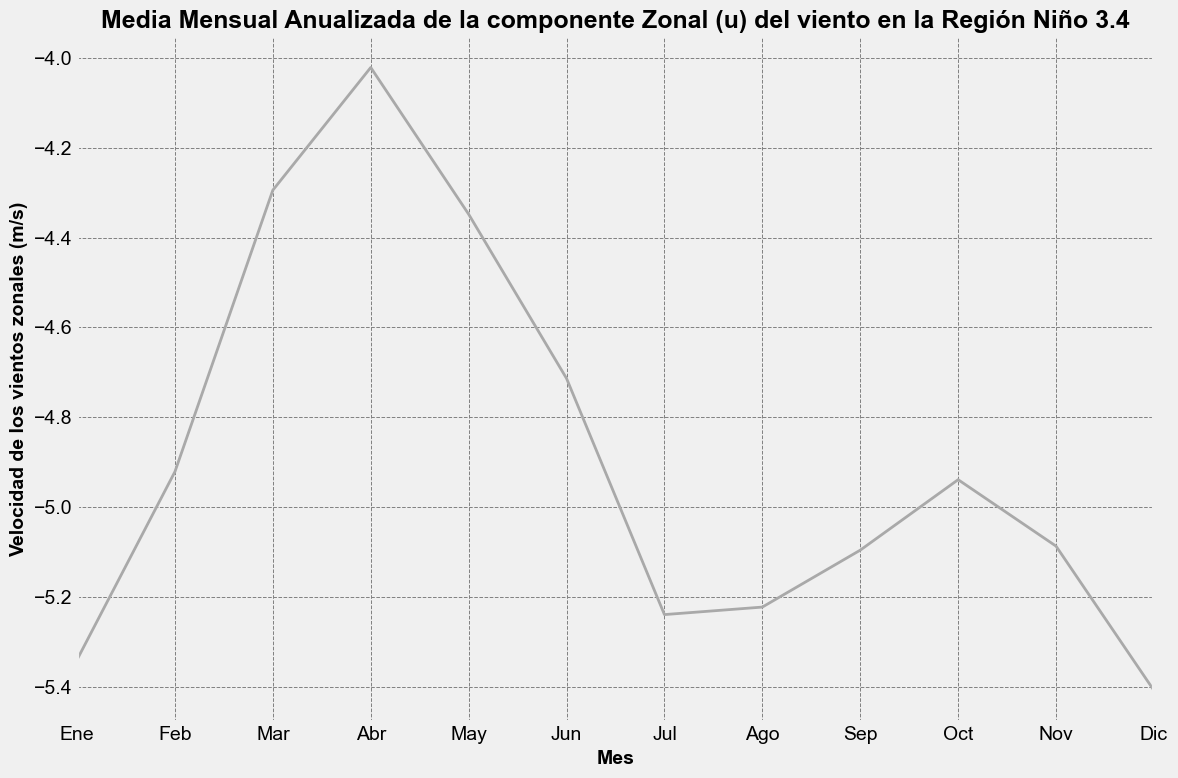

In [141]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
u_winds_df = pd.DataFrame({'u_winds': u_winds_mean.values}, index=u_winds_mean['time'].values)

# Calcular la media mensual anualizada
u_winds_monthly_mean = u_winds_df.resample('M').mean()  # Media mensual
u_winds_monthly_mean_anualizada = u_winds_monthly_mean.groupby(u_winds_monthly_mean.index.month).mean()


# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(u_winds_monthly_mean_anualizada.index, u_winds_monthly_mean_anualizada['u_winds'], color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

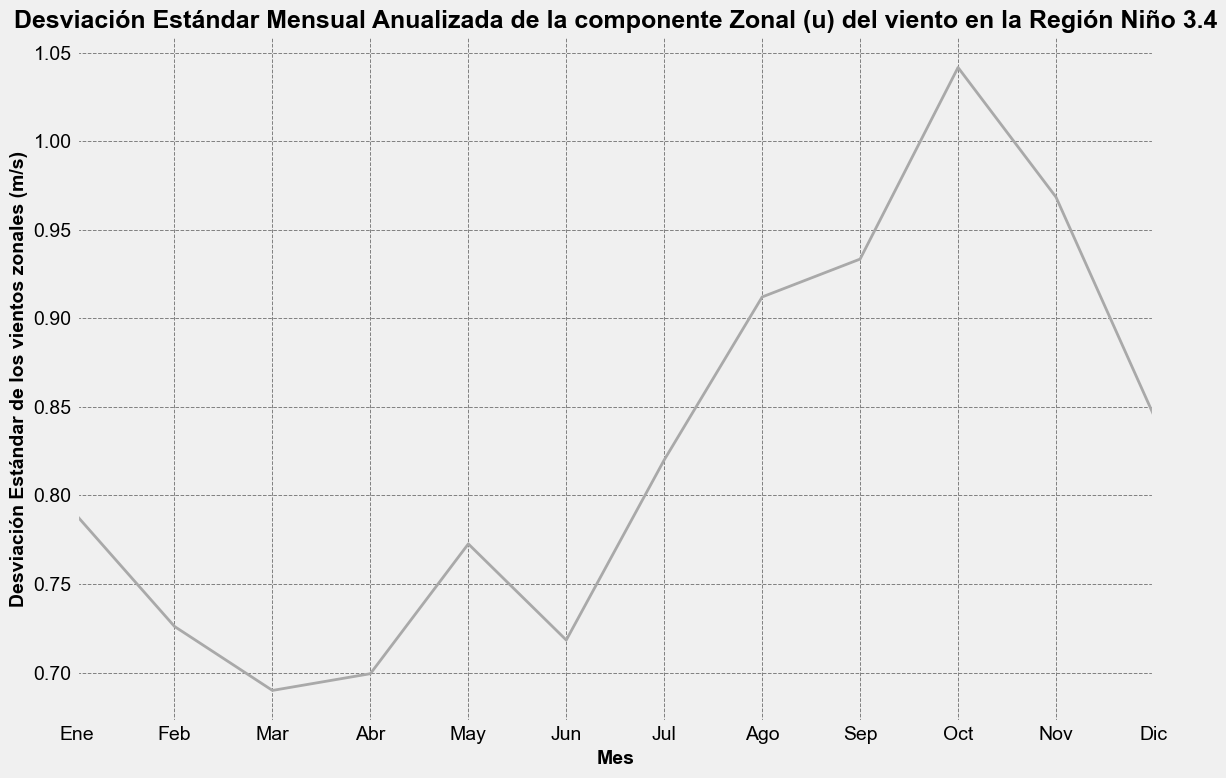

In [142]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
u_winds_monthly_std_anualizada = u_winds_df.groupby(u_winds_df.index.month).std()


# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight') 

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(u_winds_monthly_std_anualizada.index, u_winds_monthly_std_anualizada['u_winds'], color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

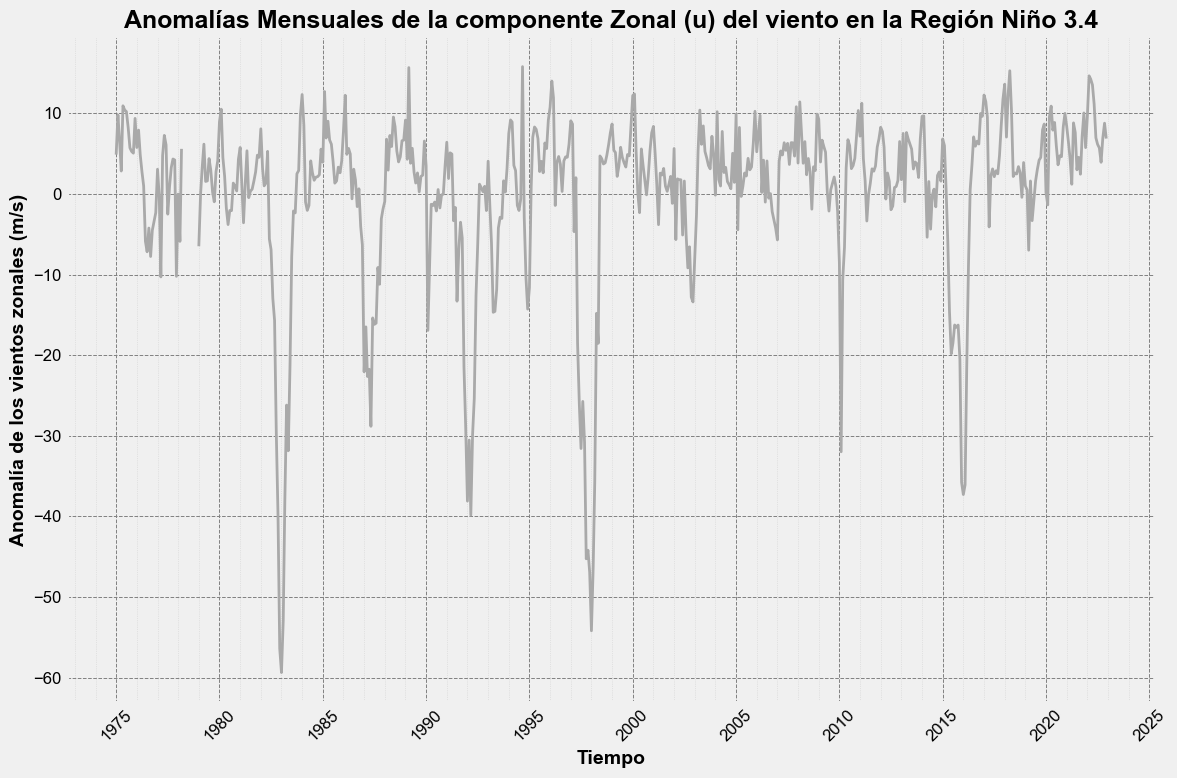

In [143]:
#Anomalia Mensual



# Calcular las anomalías mensuales
u_winds_anomalies = u_winds_df.copy()
u_winds_anomalies['Anomalía'] = u_winds_df['u_winds'] - u_winds_anomalies.index.month.map(u_winds_monthly_mean_anualizada['u_winds'])


# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(olr_anomalies.index, olr_anomalies['Anomalía'], color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

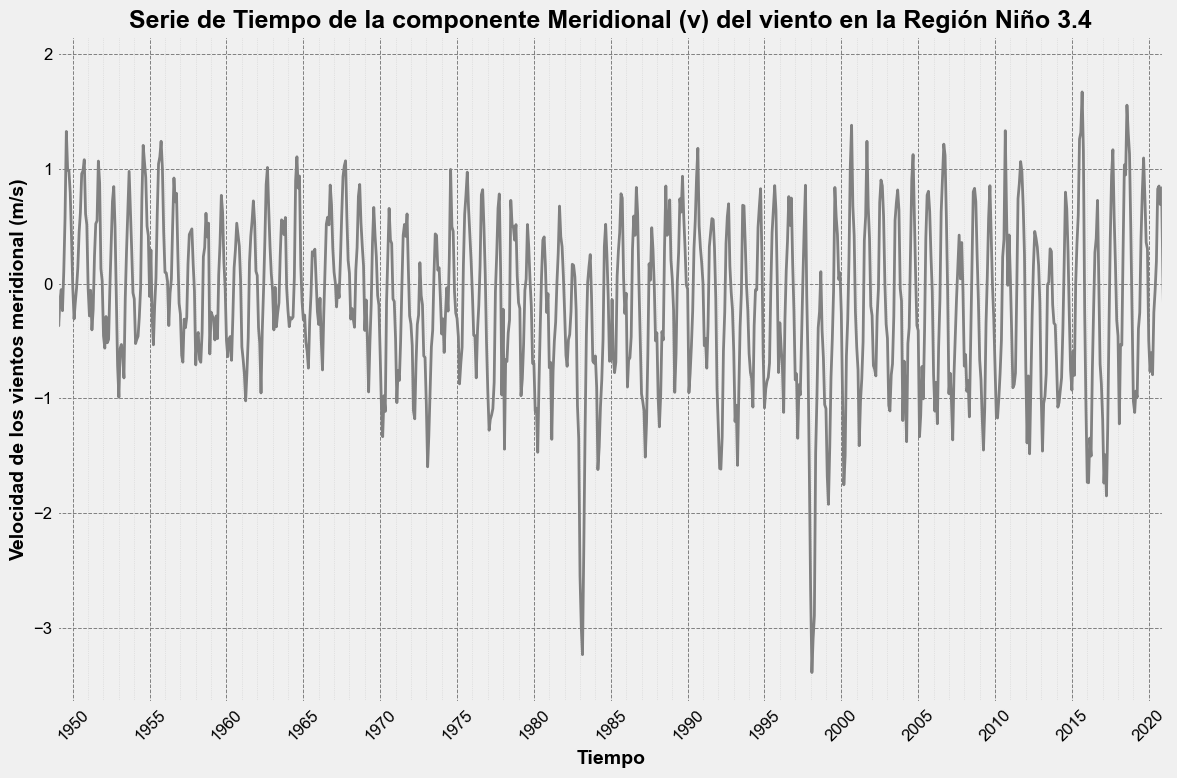

In [144]:
#Vientos meridoniales (10 mts)

plt.rc('font', family='Arial', size=10)


# Recortamos la gráfica de slp a la región requerida por nosotros
df_v_winds_nino3_4 = df_v_winds.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
v_winds = df_v_winds_nino3_4['vwnd']
# Calcular el promedio sobre las dimensiones de latitud y longitud
v_winds_mean = v_winds.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(v_winds_mean['time'], v_winds_mean, color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos meridional (m/s)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(v_winds_mean['time'].min().values, v_winds_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

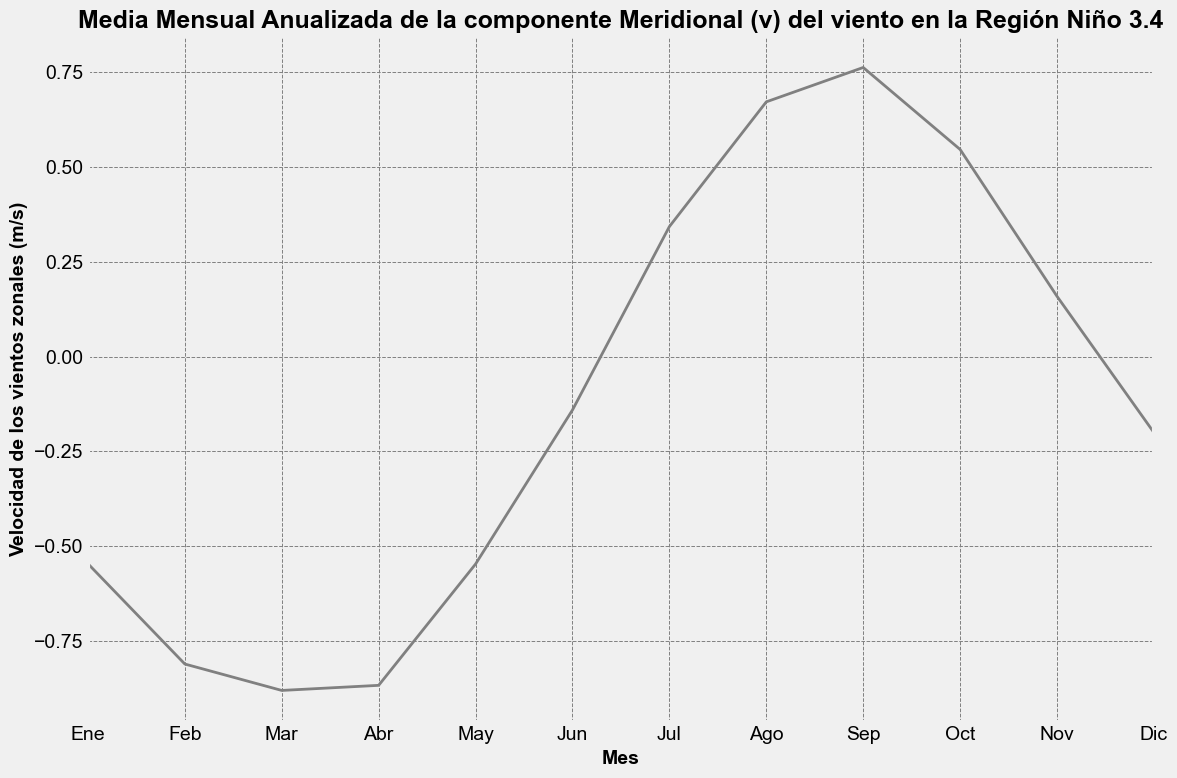

In [145]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
v_winds_df = pd.DataFrame({'v_winds': v_winds_mean.values}, index=v_winds_mean['time'].values)

# Calcular la media mensual anualizada
v_winds_monthly_mean = v_winds_df.resample('M').mean()  # Media mensual
v_winds_monthly_mean_anualizada = v_winds_monthly_mean.groupby(v_winds_monthly_mean.index.month).mean()


plt.rc('font', family='Arial', size=10)

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  


# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(v_winds_monthly_mean_anualizada.index, v_winds_monthly_mean_anualizada['v_winds'], color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

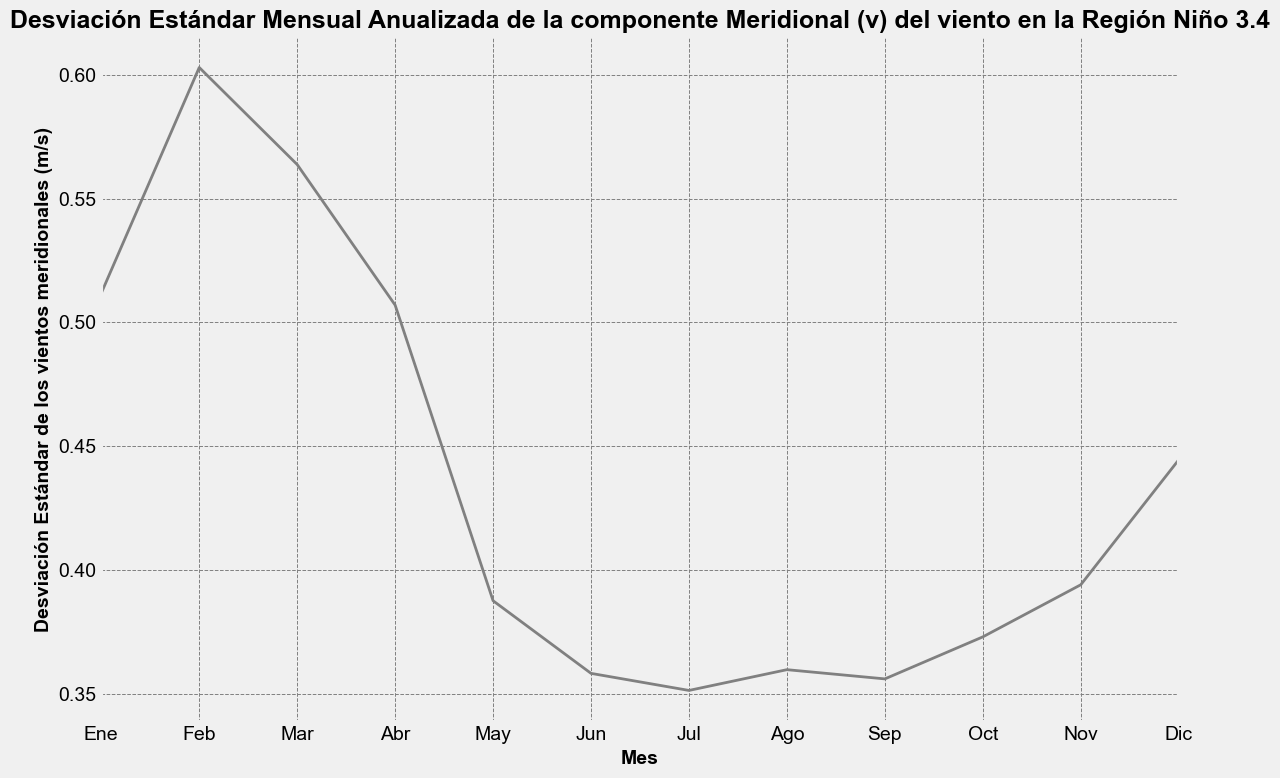

In [146]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
v_winds_monthly_std_anualizada = v_winds_df.groupby(v_winds_df.index.month).std()

plt.rc('font', family='Arial', size=10)

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight') 

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(v_winds_monthly_std_anualizada.index, v_winds_monthly_std_anualizada['v_winds'], color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de los vientos meridionales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

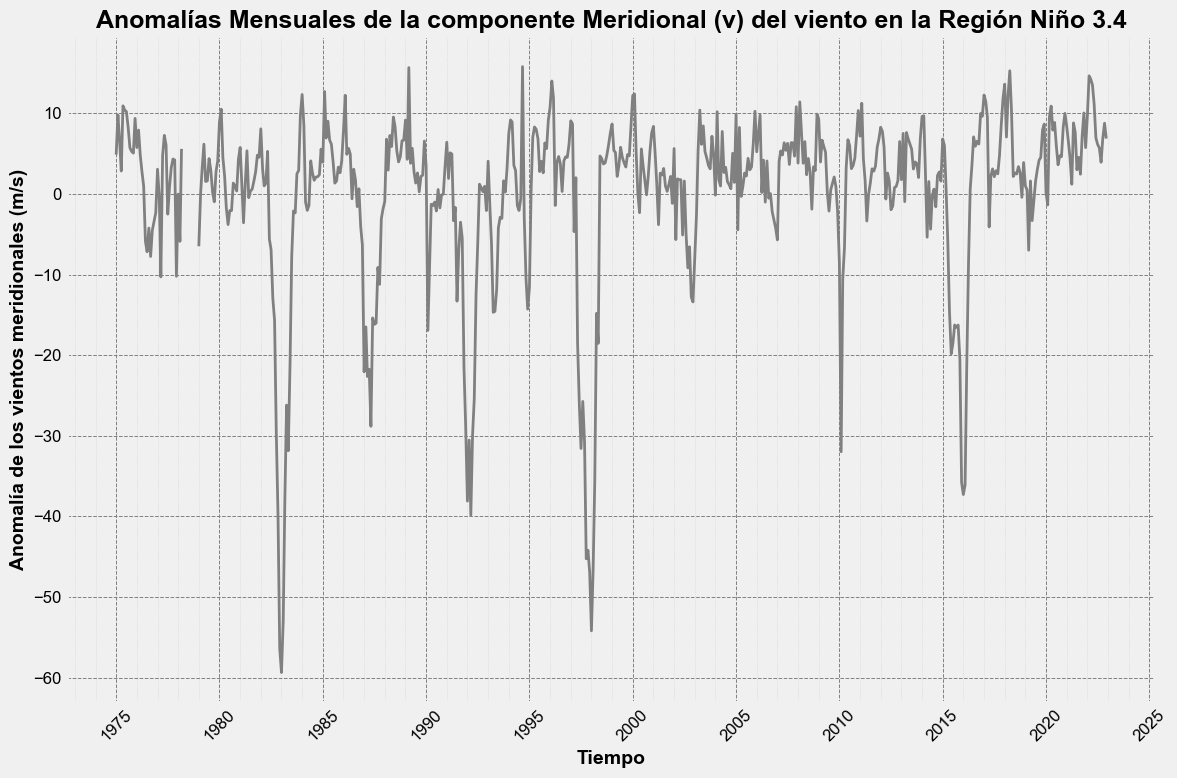

In [147]:
#Anomalia Mensual

# Calcular las anomalías mensuales
v_winds_anomalies = v_winds_df.copy()
v_winds_anomalies['Anomalía'] = v_winds_df['v_winds'] - v_winds_anomalies.index.month.map(v_winds_monthly_mean_anualizada['v_winds'])

plt.rc('font', family='Arial', size=10)

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(olr_anomalies.index, olr_anomalies['Anomalía'], color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de los vientos meridionales (m/s)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

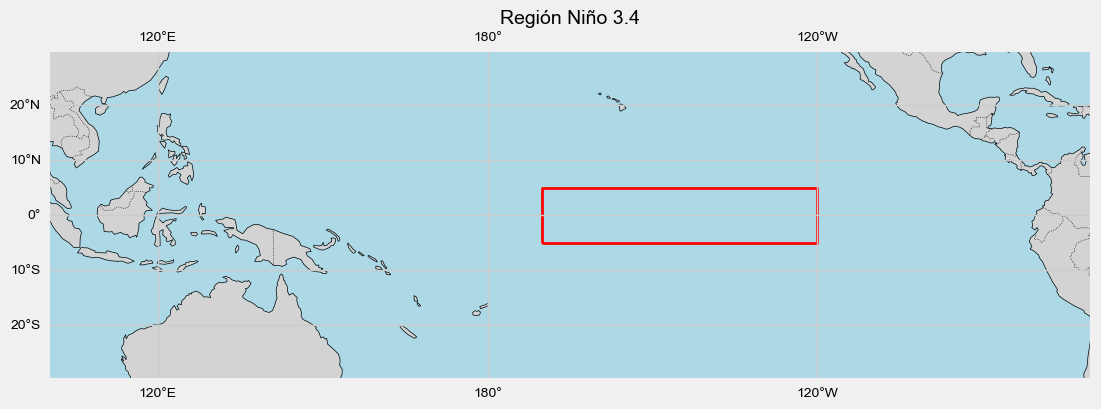

In [148]:
plt.rc('font', family='Arial', size=10)

# Crear una figura y un eje con proyección de mapa
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Agregar características de tierra y océanos
ax.add_feature(cfeature.LAND, color='lightgrey', edgecolor='black')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Dibujar un cuadro en la región Niño 3.4
latitudes = [-5, 5, 5, -5, -5]  # Coordenadas de latitud para Niño 3.4
longitudes = [190, 190, 240, 240, 190]  # Coordenadas de longitud para Niño 3.4 

ax.plot(longitudes, latitudes, color='red', linewidth=2, transform=ccrs.PlateCarree(), label='Región Niño 3.4')

# límites del mapa 
ax.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())

# Agregar meridianos y paralelos
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Título y leyenda
ax.set_title("Región Niño 3.4", fontsize=14, )

# Mostrar el mapa
plt.show()